# Coding Etiquette & Excel Reporting 3

1. Import Libraries and Data

2. Bar Chart of Customer Profile Variable

3. Statistics of Variables

4. Visualizations

5. Export File

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\rpa21\Instacart Basket Analysis'

In [4]:
df_last = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_cust_grp_merge3.pkl'))

In [6]:
df_last.shape

(24414877, 38)

Create a Bar Chart of the customer profile variable

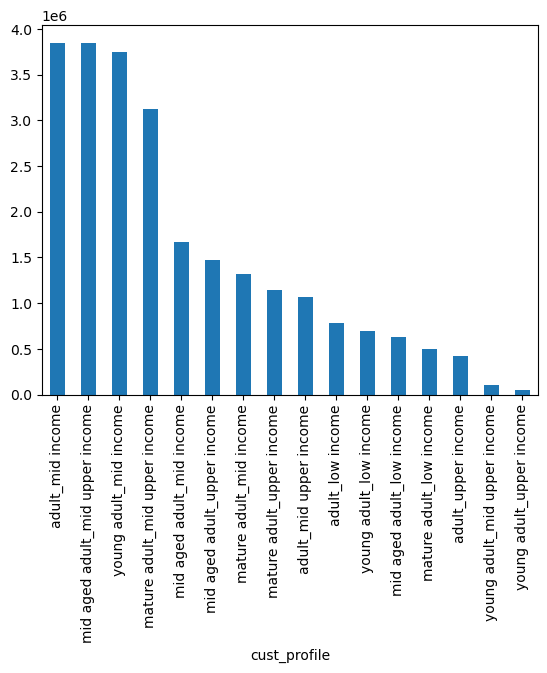

In [20]:
customer_profile_counts_bar = df_last['cust_profile'].value_counts().plot.bar()

In [21]:
customer_profile_counts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_counts.png'))

Variable Statistics

In [28]:
df_last.groupby('cust_profile').agg({'customer_frequency': ['mean', 'min', 'max']})

customer_frequency           
                                              mean  min   max
cust_profile                                                 
adult_low income                          9.520256  0.0  30.0
adult_mid income                          8.874457  0.0  30.0
adult_mid upper income                    8.860269  0.0  30.0
adult_upper income                        8.934137  0.0  30.0
mature adult_low income                   9.226814  0.0  30.0
mature adult_mid income                   8.955929  0.0  30.0
mature adult_mid upper income             8.890790  0.0  30.0
mature adult_upper income                 8.874290  0.0  30.0
mid aged adult_low income                 9.359898  0.0  30.0
mid aged adult_mid income                 8.990707  0.0  30.0
mid aged adult_mid upper income           8.969439  0.0  30.0
mid aged adult_upper income               8.757942  0.0  30.0
young adult_low income                    9.391680  0.0  30.0
young adult_mid income                    8.880002  0.0  30.0
young adult_mid upper income              9.004766  1.0  30.0
young adult_upper income                  8.045709  2.0  30.0

In [29]:
df_last.groupby('cust_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                                     mean  min   max
cust_profile                                        
adult_low income                 6.839605  1.0  25.0
adult_mid income                 7.928138  1.0  25.0
adult_mid upper income           7.957735  1.0  25.0
adult_upper income               7.919307  1.0  25.0
mature adult_low income          6.507868  1.0  25.0
mature adult_mid income          7.769657  1.0  25.0
mature adult_mid upper income    7.949926  1.0  25.0
mature adult_upper income        7.949110  1.0  25.0
mid aged adult_low income        6.513059  1.0  25.0
mid aged adult_mid income        7.759391  1.0  25.0
mid aged adult_mid upper income  7.957165  1.0  25.0
mid aged adult_upper income      7.935160  1.0  25.0
young adult_low income           6.899487  1.0  25.0
young adult_mid income           7.942075  1.0  25.0
young adult_mid upper income     7.902751  1.0  25.0
young adult_upper income         7.815685  1.0  25.0

Visualizations

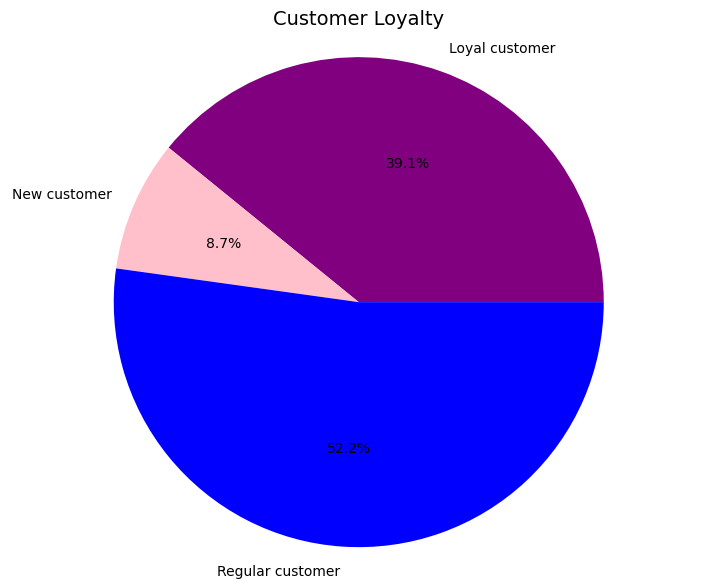

In [22]:
#Loyalty Pie Chart
loyalty = (df_last['loyalty_flag'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(9, 7))  # Set figure size
loyalty_pie = plt.pie(loyalty, labels=loyalty.index, autopct='%1.1f%%', colors=['purple', 'pink', 'blue'])
plt.title('Customer Loyalty', fontsize=14)
plt.axis('equal')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_loyalty.png'))

In [30]:
# Statistics for regions
df_last.groupby('region').agg({'order_number': ['mean'], 'prices':['mean']})

,order_number,prices
,mean,mean
region,,
Midwest,21.702417,7.790719
Northeast,22.031923,7.781979
South,21.965822,7.795570
West,22.098505,7.790263


In [31]:
spending_region = df_last.groupby(['region'])['prices'].mean()

In [32]:
spending_region

region
Midwest      7.790719
Northeast    7.781979
South        7.795570
West         7.790263
Name: prices, dtype: float64

In [34]:
df_last['frequency_flag'].value_counts(dropna = False)

frequency_flag
Frequent_customer        18136758
Regular_customer          4814601
Non_frequent_customer     1463518
Name: count, dtype: int64

In [5]:
#Crosstab of customer profile and department id.
spending_dept = pd.crosstab(df_last['department_id'], df_last['spender_flag'], dropna = False).sort_values(by = 'High spender', ascending = False)

In [7]:
spending_dept.to_clipboard()

In [6]:
spending_dept

spender_flag,High spender,Low spender
department_id,,
4,7224947,2144
16,4119587,901
19,2182665,4456
7,2033407,3040
1,1627352,262
13,1385092,283
3,883175,155
15,787662,128
20,782815,196


In [37]:
# to use for a bar graph
spending_dept_2 = spending_dept.reset_index().melt(id_vars='department_id', var_name='Spending', value_name= 'count')

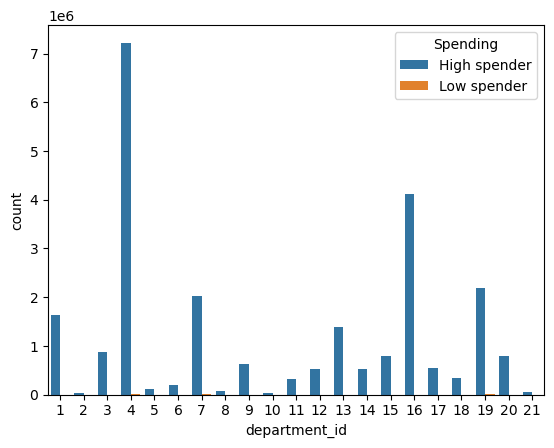

In [38]:
#plot graph of customer profile and departments
spending_dept_bar = sns.barplot(x = 'department_id', y = 'count', hue = 'Spending', data = spending_dept_2,)

In [39]:
# Save bar chart
spending_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_dept.png'))

The departments that high spenders purchase from the most are, in order from largest amounts, 4:produce, 16:dairy eggs,
19:snacks, 7:beverages, 1:frozen, and 13:pantry. 

In [40]:
#Crosstab of customer profile and department id.
region_frequency = pd.crosstab(df_last['region'], df_last['frequency_flag'], dropna = False)

In [41]:
#Check crosstab
region_frequency

frequency_flag,Frequent_customer,Non_frequent_customer,Regular_customer
region,,,
Midwest,4213478,350154,1148124
Northeast,3204565,250508,860198
South,6049059,490297,1589730
West,4669656,372559,1216549


In [52]:
# to use for a bar graph
region_frequency_2 = region_frequency.reset_index().melt(id_vars='region', var_name='Customer Frequency', value_name= 'count')

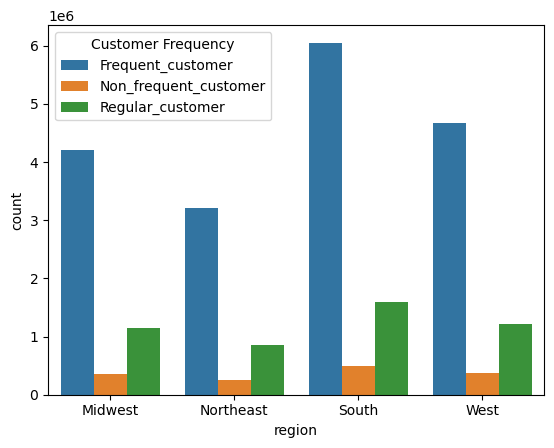

In [53]:
#plot graph of customer profile and departments
region_frequency_bar = sns.barplot(x = 'region', y = 'count', hue = 'Customer Frequency', data = region_frequency_2,)

The South region has the most customers and the most frequent customers, followed by west region. 

In [55]:
# Save Bar chart
region_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_frequency.png'))

In [44]:
#create a dataframe for customer profile and region
customer_spending = df_last.groupby(['orders_day_of_week'])['prices'].sum()

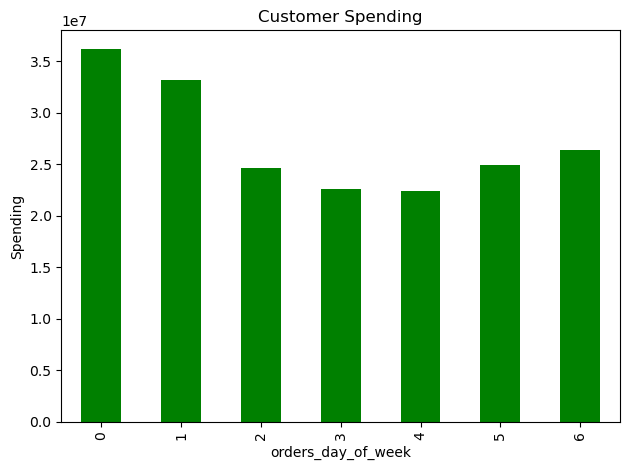

In [56]:
# Create a bar chart for total spending at 2 am grouped by departments
bar_cust_spending = customer_spending.plot.bar(color='green')
plt.title('Customer Spending')
plt.ylabel('Spending')
plt.xlabel('orders_day_of_week')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_spending4.png'))

In [46]:
# Create a dataframe
customer_profile_spend = df_last.groupby(['cust_profile'])['orders_day_of_week'].sum()

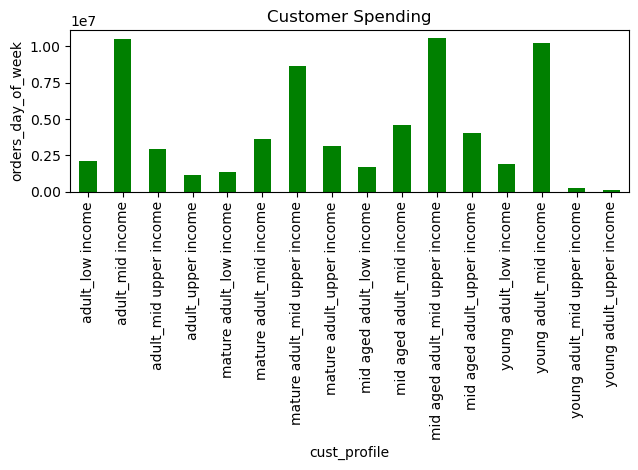

In [57]:
bar_cust_spending = customer_profile_spend.plot.bar(color='green')
plt.title('Customer Spending')
plt.ylabel('orders_day_of_week')
plt.xlabel('cust_profile')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_spend_dow.png'))

In [58]:
df_last.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_last.pkl'))